In [1]:
# load libraies

%run py_libraries.py

/Users/4476224/.local/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.13.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# loading utility files

from utility.sv_fig import savefig
from utility.make_cm import make_confusion_matrix
from utility.get_g_result import get_gamma_results
from utility.plt_result import plot_results

In [3]:
def savefig(filename, crop = True):
    plt.savefig('{}.pdf'.format(filename))

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

# load data
data = pd.read_excel('data/PDAC_data_04_24.xlsx')
data = data.loc[0:317]

print(data.shape)

(318, 156)


In [5]:
Ndata = data[['DATSTAT_ALTPID', 'CACHEX_STAGE_0_VIG', 'GENDER','BMI','RACE_ETHN', \
              'ENA.78_T1', 'IFN.y_T1', 'IL.10_T1', 'IL.1B_T1', 'IL.6_T1', 'IL.8_T1', 'MCP.1_T1', \
              'MDC_T1', 'MIP.1a_T1', 'TNF.a_T1', 'C.peptide_T1', 'G.CSF_T1', 'IL.1a_T1', 'IL.22_T1', \
              'Insulin_T1', 'Leptin_T1', 'MIP.3a_T1', 'GRO.a_T1', 'HGF_T1', 'IGF.1_T1', 'MMP.2_T1', \
              'Adiponectin_T1', 'CRP_T1', 'GDF.15_T1', 'TIMP.1_T1', 'TGF.B2_T1', 'TGF.B3_T1', 'TGF.B1_T1', \
              'PPAR.y_T1', 'Activin A_T1', 'Activin RIIB_T1', 'Angiotensin II_T1', 'a.SMA_T1', 'HIF.1a_T1', \
              'Laminin_T1', 'HbA1c_T1', 'Cotinine_T1', 'CA19.9_T1', 'Glucose_T1', 'HDL_T1', 'CCK_T1', 'LDL_T1', \
              'Triglyceride_T1', 'Albumin_T1', 'Fibronectin_T1', 'Lumican_T1', 'ZAG_T1', 'MMP.14_T1']].copy()

Ndata = Ndata.rename(columns={'CACHEX_STAGE_0_VIG': 'CACHEXSTAGE0VIG'})

Ndata = Ndata.rename(columns={'ENA.78_T1': 'ENA.78'});             Ndata = Ndata.rename(columns={'IFN.y_T1': 'IFN.y'});                   Ndata = Ndata.rename(columns={'IL.10_T1': 'IL.10'});
Ndata = Ndata.rename(columns={'IL.1B_T1': 'IL.1B'});               Ndata = Ndata.rename(columns={'IL.6_T1': 'IL.6'});                     Ndata = Ndata.rename(columns={'IL.8_T1': 'IL.8'});
Ndata = Ndata.rename(columns={'MCP.1_T1': 'MCP.1'});               Ndata = Ndata.rename(columns={'MDC_T1': 'MDC'});                       Ndata = Ndata.rename(columns={'MIP.1a_T1': 'MIP.1a'});
Ndata = Ndata.rename(columns={'TNF.a_T1': 'TNF.a'});               Ndata = Ndata.rename(columns={'C.peptide_T1': 'C.peptide'});           Ndata = Ndata.rename(columns={'G.CSF_T1': 'G.CSF'});
Ndata = Ndata.rename(columns={'IL.1a_T1': 'IL.1a'});               Ndata = Ndata.rename(columns={'IL.22_T1': 'IL.22'});                   Ndata = Ndata.rename(columns={'Insulin_T1': 'Insulin'});
Ndata = Ndata.rename(columns={'Leptin_T1': 'Leptin'});             Ndata = Ndata.rename(columns={'MIP.3a_T1': 'MIP.3a'});                 Ndata = Ndata.rename(columns={'GRO.a_T1': 'GRO.a'});
Ndata = Ndata.rename(columns={'HGF_T1': 'HGF'});                   Ndata = Ndata.rename(columns={'IGF.1_T1': 'IGF.1'});                   Ndata = Ndata.rename(columns={'MMP.2_T1': 'MMP.2'});
Ndata = Ndata.rename(columns={'Adiponectin_T1': 'Adiponectin'});   Ndata = Ndata.rename(columns={'CRP_T1': 'CRP'});                       Ndata = Ndata.rename(columns={'GDF.15_T1': 'GDF.15'});
Ndata = Ndata.rename(columns={'TIMP.1_T1': 'TIMP.1'});             Ndata = Ndata.rename(columns={'TGF.B2_T1': 'TGF.B2'});                 Ndata = Ndata.rename(columns={'TGF.B3_T1': 'TGF.B3'});
Ndata = Ndata.rename(columns={'TGF.B1_T1': 'TGF.B1'});             Ndata = Ndata.rename(columns={'PPAR.y_T1': 'PPAR.y'});                 Ndata = Ndata.rename(columns={'Activin A_T1': 'Activin_A'});
Ndata = Ndata.rename(columns={'Activin RIIB_T1': 'Activin_RIIB'}); Ndata = Ndata.rename(columns={'Angiotensin II_T1': 'Angiotensin_II'}); Ndata = Ndata.rename(columns={'a.SMA_T1': 'a.SMA'});
Ndata = Ndata.rename(columns={'HIF.1a_T1': 'HIF.1a'});             Ndata = Ndata.rename(columns={'Laminin_T1': 'Laminin'});               Ndata = Ndata.rename(columns={'HbA1c_T1': 'HbA1c'});
Ndata = Ndata.rename(columns={'Cotinine_T1': 'Cotinine'});         Ndata = Ndata.rename(columns={'CA19.9_T1': 'CA19.9'});                 Ndata = Ndata.rename(columns={'Glucose_T1': 'Glucose'});
Ndata = Ndata.rename(columns={'HDL_T1': 'HDL'});                   Ndata = Ndata.rename(columns={'CCK_T1': 'CCK'});                       Ndata = Ndata.rename(columns={'LDL_T1': 'LDL'});
Ndata = Ndata.rename(columns={'Triglyceride_T1': 'Triglyceride'}); Ndata = Ndata.rename(columns={'Albumin_T1': 'Albumin'});               Ndata = Ndata.rename(columns={'Fibronectin_T1': 'Fibronectin'});
Ndata = Ndata.rename(columns={'Lumican_T1': 'Lumican'});           Ndata = Ndata.rename(columns={'ZAG_T1': 'ZAG'});                       Ndata = Ndata.rename(columns={'MMP.14_T1': 'MMP.14'});



print(Ndata.shape)

(318, 53)


In [6]:

Ndata = Ndata.replace(to_replace="non cachexia",value="NCa")
Ndata = Ndata.replace(to_replace="pre cachexia",value="PCa")
Ndata = Ndata.replace(to_replace="cachexia",value="Ca")
Ndata = Ndata.replace(to_replace="refractory cachexia",value="RCa")


(318, 53)


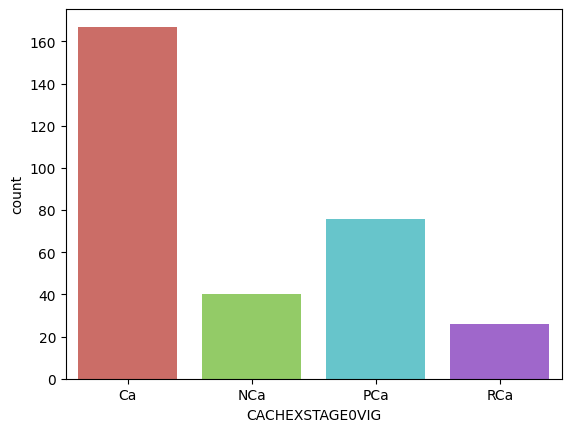

In [7]:
extracted_col0 = Ndata.iloc[:,0:1] #ID

extracted_col1 = Ndata["ENA.78"];        extracted_col2 = Ndata["IFN.y"];           extracted_col3 = Ndata["IL.10"];
extracted_col4 = Ndata["IL.1B"];         extracted_col5 = Ndata["IL.6"];            extracted_col6 = Ndata["IL.8"];
extracted_col7 = Ndata["MCP.1"];         extracted_col8 = Ndata["MDC"];             extracted_col9 = Ndata["MIP.1a"];
extracted_col10 = Ndata["TNF.a"];        extracted_col11 = Ndata["C.peptide"];      extracted_col12 = Ndata["G.CSF"];
extracted_col13 = Ndata["IL.1a"];        extracted_col14 = Ndata["IL.22"];          extracted_col15 = Ndata["Insulin"];
extracted_col16 = Ndata["Leptin"];       extracted_col17 = Ndata["MIP.3a"];         extracted_col18 = Ndata["GRO.a"];
extracted_col19 = Ndata["HGF"];          extracted_col20 = Ndata["IGF.1"];          extracted_col21 = Ndata["MMP.2"];
extracted_col22 = Ndata["Adiponectin"];  extracted_col23 = Ndata["CRP"];            extracted_col24 = Ndata["GDF.15"];
extracted_col25 = Ndata["TIMP.1"];       extracted_col26 = Ndata["TGF.B2"];         extracted_col27 = Ndata["TGF.B3"];
extracted_col28 = Ndata["TGF.B1"];       extracted_col29 = Ndata["PPAR.y"];         extracted_col30 = Ndata["Activin_A"];
extracted_col31 = Ndata["Activin_RIIB"]; extracted_col32 = Ndata["Angiotensin_II"]; extracted_col33 = Ndata["a.SMA"];
extracted_col34 = Ndata["HIF.1a"];       extracted_col35 = Ndata["Laminin"];        extracted_col36 = Ndata["HbA1c"];
extracted_col37 = Ndata["Cotinine"];     extracted_col38 = Ndata["CA19.9"];         extracted_col39 = Ndata["Glucose"];
extracted_col40 = Ndata["HDL"];          extracted_col41 = Ndata["CCK"];            extracted_col42 = Ndata["LDL"];
extracted_col43 = Ndata["Triglyceride"]; extracted_col44 = Ndata["Albumin"];        extracted_col45 = Ndata["Fibronectin"];
extracted_col46 = Ndata["Lumican"];      extracted_col47 = Ndata["ZAG"];            extracted_col48 = Ndata["MMP.14"];
extracted_col49 = Ndata['GENDER'];          extracted_col50 = Ndata['BMI'];               extracted_col51 = Ndata['RACE_ETHN'];

extracted_col52 = Ndata["CACHEXSTAGE0VIG"]

ndata = extracted_col0
ndata = ndata.join(extracted_col1);  ndata = ndata.join(extracted_col2);  ndata = ndata.join(extracted_col3);  
ndata = ndata.join(extracted_col4);  ndata = ndata.join(extracted_col5);  ndata = ndata.join(extracted_col6);
ndata = ndata.join(extracted_col7);  ndata = ndata.join(extracted_col8);  ndata = ndata.join(extracted_col9);  
ndata = ndata.join(extracted_col10); ndata = ndata.join(extracted_col11); ndata = ndata.join(extracted_col12);
ndata = ndata.join(extracted_col13); ndata = ndata.join(extracted_col14); ndata = ndata.join(extracted_col15); 
ndata = ndata.join(extracted_col16); ndata = ndata.join(extracted_col17); ndata = ndata.join(extracted_col18);
ndata = ndata.join(extracted_col19); ndata = ndata.join(extracted_col20); ndata = ndata.join(extracted_col21); 
ndata = ndata.join(extracted_col22); ndata = ndata.join(extracted_col23); ndata = ndata.join(extracted_col24);
ndata = ndata.join(extracted_col25); ndata = ndata.join(extracted_col26); ndata = ndata.join(extracted_col27);
ndata = ndata.join(extracted_col28); ndata = ndata.join(extracted_col29); ndata = ndata.join(extracted_col30);
ndata = ndata.join(extracted_col31); ndata = ndata.join(extracted_col32); ndata = ndata.join(extracted_col33);
ndata = ndata.join(extracted_col34); ndata = ndata.join(extracted_col35); ndata = ndata.join(extracted_col36);
ndata = ndata.join(extracted_col37); ndata = ndata.join(extracted_col38); ndata = ndata.join(extracted_col39);
ndata = ndata.join(extracted_col40); ndata = ndata.join(extracted_col41); ndata = ndata.join(extracted_col42);
ndata = ndata.join(extracted_col43); ndata = ndata.join(extracted_col44); ndata = ndata.join(extracted_col45);
ndata = ndata.join(extracted_col46); ndata = ndata.join(extracted_col47); ndata = ndata.join(extracted_col48);
ndata = ndata.join(extracted_col49); ndata = ndata.join(extracted_col50); ndata = ndata.join(extracted_col51);

ndata = ndata.join(extracted_col52);

#ndata.dropna(inplace=True) # drop rows with Nan, no entries
print(ndata.shape)

# count class imbalance # data
ndata.CACHEXSTAGE0VIG.value_counts()/len(ndata.index)
sns.countplot(x='CACHEXSTAGE0VIG',data=ndata,palette='hls')

savefig('./figs/his_01')
#plt.show()

In [8]:
ndata[ndata.CACHEXSTAGE0VIG == 'NCa'].shape

(40, 53)

In [9]:
ndata[ndata.CACHEXSTAGE0VIG == 'PCa'].shape

(76, 53)

In [10]:
ndata[ndata.CACHEXSTAGE0VIG == 'Ca'].shape

(167, 53)

In [11]:
ndata[ndata.CACHEXSTAGE0VIG == 'RCa'].shape

(26, 53)

In [12]:
print(ndata.count())
print(ndata.shape)

DATSTAT_ALTPID     318
ENA.78             206
IFN.y              206
IL.10              205
IL.1B              130
IL.6               206
IL.8               206
MCP.1              206
MDC                206
MIP.1a             199
TNF.a              206
C.peptide          205
G.CSF              206
IL.1a               41
IL.22              197
Insulin            202
Leptin             202
MIP.3a             192
GRO.a              206
HGF                206
IGF.1               34
MMP.2              204
Adiponectin        206
CRP                206
GDF.15             206
TIMP.1             206
TGF.B2             181
TGF.B3              38
TGF.B1             206
PPAR.y             205
Activin_A          145
Activin_RIIB        76
Angiotensin_II     146
a.SMA              171
HIF.1a             191
Laminin            206
HbA1c              206
Cotinine            26
CA19.9             186
Glucose            199
HDL                206
CCK                204
LDL                206
Triglycerid

In [13]:
ndata_c = ndata.dropna(subset=['CACHEXSTAGE0VIG'])
ndata_c2 = ndata_c.drop(['GENDER','BMI','RACE_ETHN'], axis=1)
ndata_c2 = ndata_c2.drop(['IL.1B','IL.1a','IGF.1','TGF.B3','Activin_A','Activin_RIIB','Angiotensin_II','Cotinine','MMP.14','Fibronectin','a.SMA'], axis=1)

print(ndata_c2.count())
print(ndata_c2.shape)

DATSTAT_ALTPID     309
ENA.78             202
IFN.y              202
IL.10              201
IL.6               202
IL.8               202
MCP.1              202
MDC                202
MIP.1a             195
TNF.a              202
C.peptide          201
G.CSF              202
IL.22              193
Insulin            198
Leptin             198
MIP.3a             188
GRO.a              202
HGF                202
MMP.2              200
Adiponectin        202
CRP                202
GDF.15             202
TIMP.1             202
TGF.B2             177
TGF.B1             202
PPAR.y             201
HIF.1a             188
Laminin            202
HbA1c              202
CA19.9             183
Glucose            196
HDL                202
CCK                200
LDL                202
Triglyceride       180
Albumin            200
Lumican            202
ZAG                202
CACHEXSTAGE0VIG    309
dtype: int64
(309, 39)


In [14]:
#

cols_to_check = ndata_c2.columns.tolist()
print(cols_to_check[1:-1])

['ENA.78', 'IFN.y', 'IL.10', 'IL.6', 'IL.8', 'MCP.1', 'MDC', 'MIP.1a', 'TNF.a', 'C.peptide', 'G.CSF', 'IL.22', 'Insulin', 'Leptin', 'MIP.3a', 'GRO.a', 'HGF', 'MMP.2', 'Adiponectin', 'CRP', 'GDF.15', 'TIMP.1', 'TGF.B2', 'TGF.B1', 'PPAR.y', 'HIF.1a', 'Laminin', 'HbA1c', 'CA19.9', 'Glucose', 'HDL', 'CCK', 'LDL', 'Triglyceride', 'Albumin', 'Lumican', 'ZAG']


In [15]:
ndata_f = ndata_c2.dropna(subset=cols_to_check[1:-1], how='all')

print(ndata_f.count())
print(ndata_f.shape)

DATSTAT_ALTPID     202
ENA.78             202
IFN.y              202
IL.10              201
IL.6               202
IL.8               202
MCP.1              202
MDC                202
MIP.1a             195
TNF.a              202
C.peptide          201
G.CSF              202
IL.22              193
Insulin            198
Leptin             198
MIP.3a             188
GRO.a              202
HGF                202
MMP.2              200
Adiponectin        202
CRP                202
GDF.15             202
TIMP.1             202
TGF.B2             177
TGF.B1             202
PPAR.y             201
HIF.1a             188
Laminin            202
HbA1c              202
CA19.9             183
Glucose            196
HDL                202
CCK                200
LDL                202
Triglyceride       180
Albumin            200
Lumican            202
ZAG                202
CACHEXSTAGE0VIG    202
dtype: int64
(202, 39)


In [16]:
ndata_f[ndata_f.CACHEXSTAGE0VIG == 'NCa'].shape

(28, 39)

In [17]:
ndata_f[ndata_f.CACHEXSTAGE0VIG == 'PCa'].shape

(53, 39)

In [18]:
ndata_f[ndata_f.CACHEXSTAGE0VIG == 'Ca'].shape

(103, 39)

In [19]:
ndata_f[ndata_f.CACHEXSTAGE0VIG == 'RCa'].shape

(18, 39)

In [20]:
# correlation analysis for NCa, PCa, Ca, and RCa

In [21]:
ndata_NCa = ndata_f.copy()
ndata_NCa = ndata_NCa[ndata_NCa.CACHEXSTAGE0VIG != 'PCa']
ndata_NCa = ndata_NCa[ndata_NCa.CACHEXSTAGE0VIG != 'Ca']
ndata_NCa = ndata_NCa[ndata_NCa.CACHEXSTAGE0VIG != 'RCa']

ndata_NCa = ndata_NCa.drop('DATSTAT_ALTPID', axis=1)

all_col_names = ndata_NCa.columns.tolist()
col_names = all_col_names[:-1]

print(col_names)

# print(all_col_names)

['ENA.78', 'IFN.y', 'IL.10', 'IL.6', 'IL.8', 'MCP.1', 'MDC', 'MIP.1a', 'TNF.a', 'C.peptide', 'G.CSF', 'IL.22', 'Insulin', 'Leptin', 'MIP.3a', 'GRO.a', 'HGF', 'MMP.2', 'Adiponectin', 'CRP', 'GDF.15', 'TIMP.1', 'TGF.B2', 'TGF.B1', 'PPAR.y', 'HIF.1a', 'Laminin', 'HbA1c', 'CA19.9', 'Glucose', 'HDL', 'CCK', 'LDL', 'Triglyceride', 'Albumin', 'Lumican', 'ZAG']


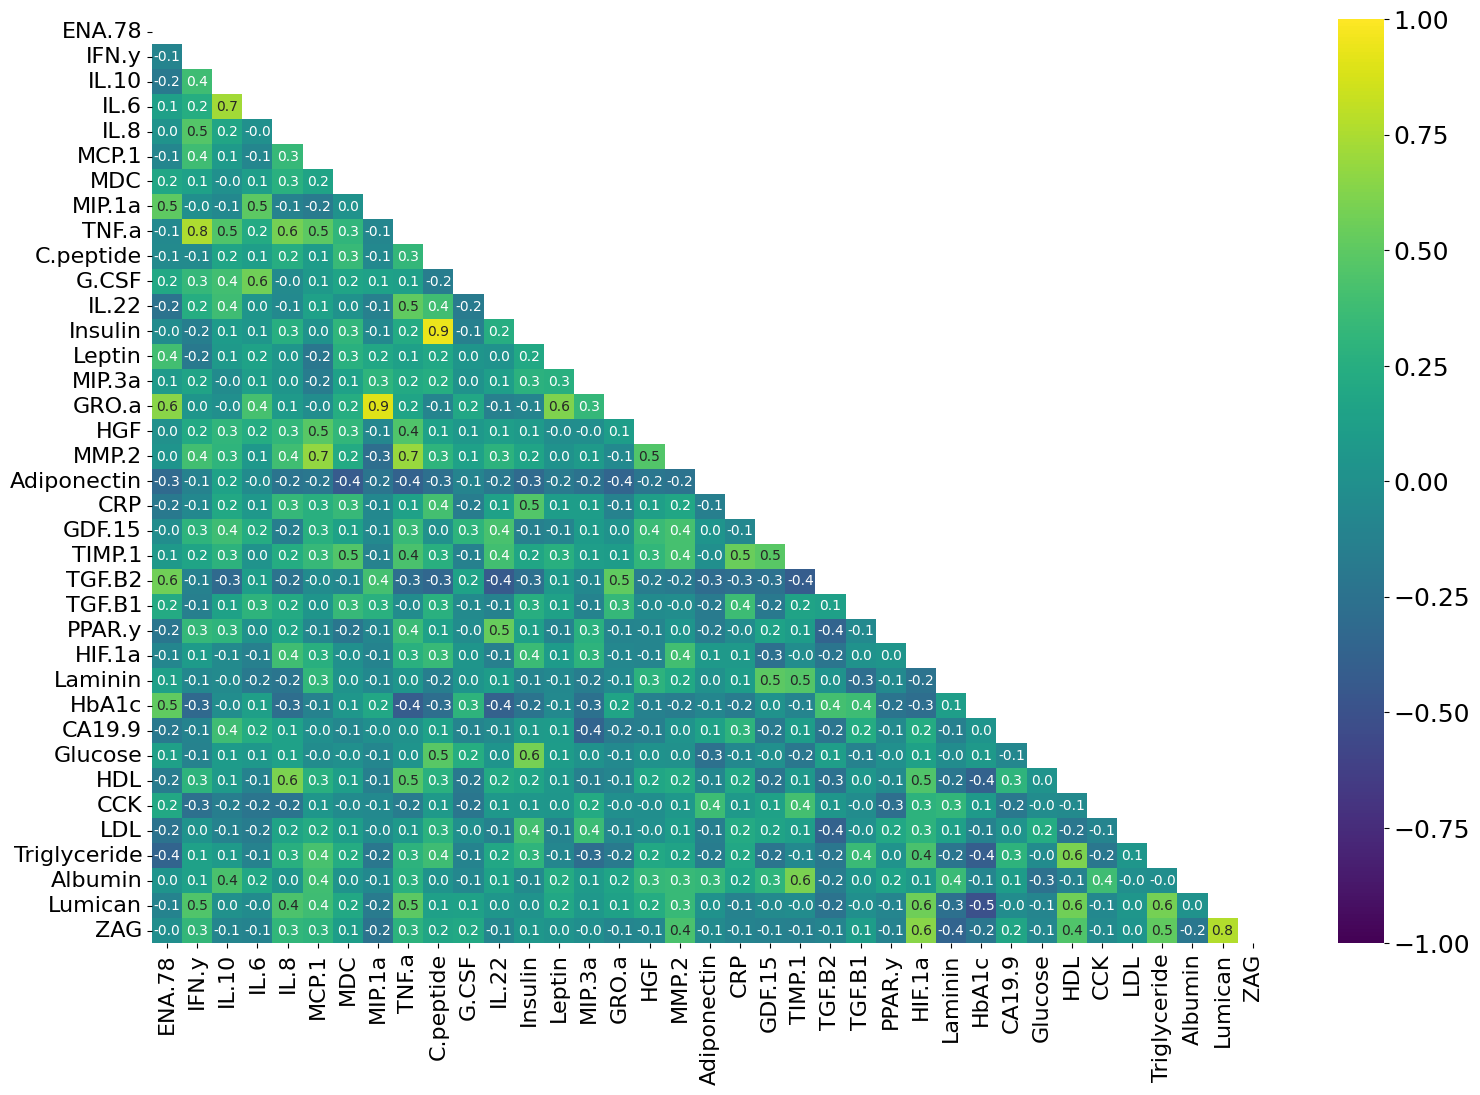

In [22]:

# Convert to pandas dataframe 
df_data = pd.DataFrame(data=ndata_NCa, 
                    columns=col_names)

plt.figure(figsize=(18, 12))
corr = df_data.corr() 
mask = np.tri(*corr.shape).T 

ax = sns.heatmap(corr, vmax=1, vmin=-1, mask=mask, annot=True, cmap='viridis', fmt=".1f", annot_kws={"size": 10})

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)


# Adjust the font size of the x and y tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)

savefig('./figs/NCa_p_corr')


In [23]:
ndata_PCa = ndata_f.copy()
ndata_PCa = ndata_PCa[ndata_PCa.CACHEXSTAGE0VIG != 'NCa']
ndata_PCa = ndata_PCa[ndata_PCa.CACHEXSTAGE0VIG != 'Ca']
ndata_PCa = ndata_PCa[ndata_PCa.CACHEXSTAGE0VIG != 'RCa']

ndata_PCa = ndata_PCa.drop('DATSTAT_ALTPID', axis=1)

all_col_names = ndata_PCa.columns.tolist()
col_names = all_col_names[:-1]

print(col_names)

# print(all_col_names)

['ENA.78', 'IFN.y', 'IL.10', 'IL.6', 'IL.8', 'MCP.1', 'MDC', 'MIP.1a', 'TNF.a', 'C.peptide', 'G.CSF', 'IL.22', 'Insulin', 'Leptin', 'MIP.3a', 'GRO.a', 'HGF', 'MMP.2', 'Adiponectin', 'CRP', 'GDF.15', 'TIMP.1', 'TGF.B2', 'TGF.B1', 'PPAR.y', 'HIF.1a', 'Laminin', 'HbA1c', 'CA19.9', 'Glucose', 'HDL', 'CCK', 'LDL', 'Triglyceride', 'Albumin', 'Lumican', 'ZAG']


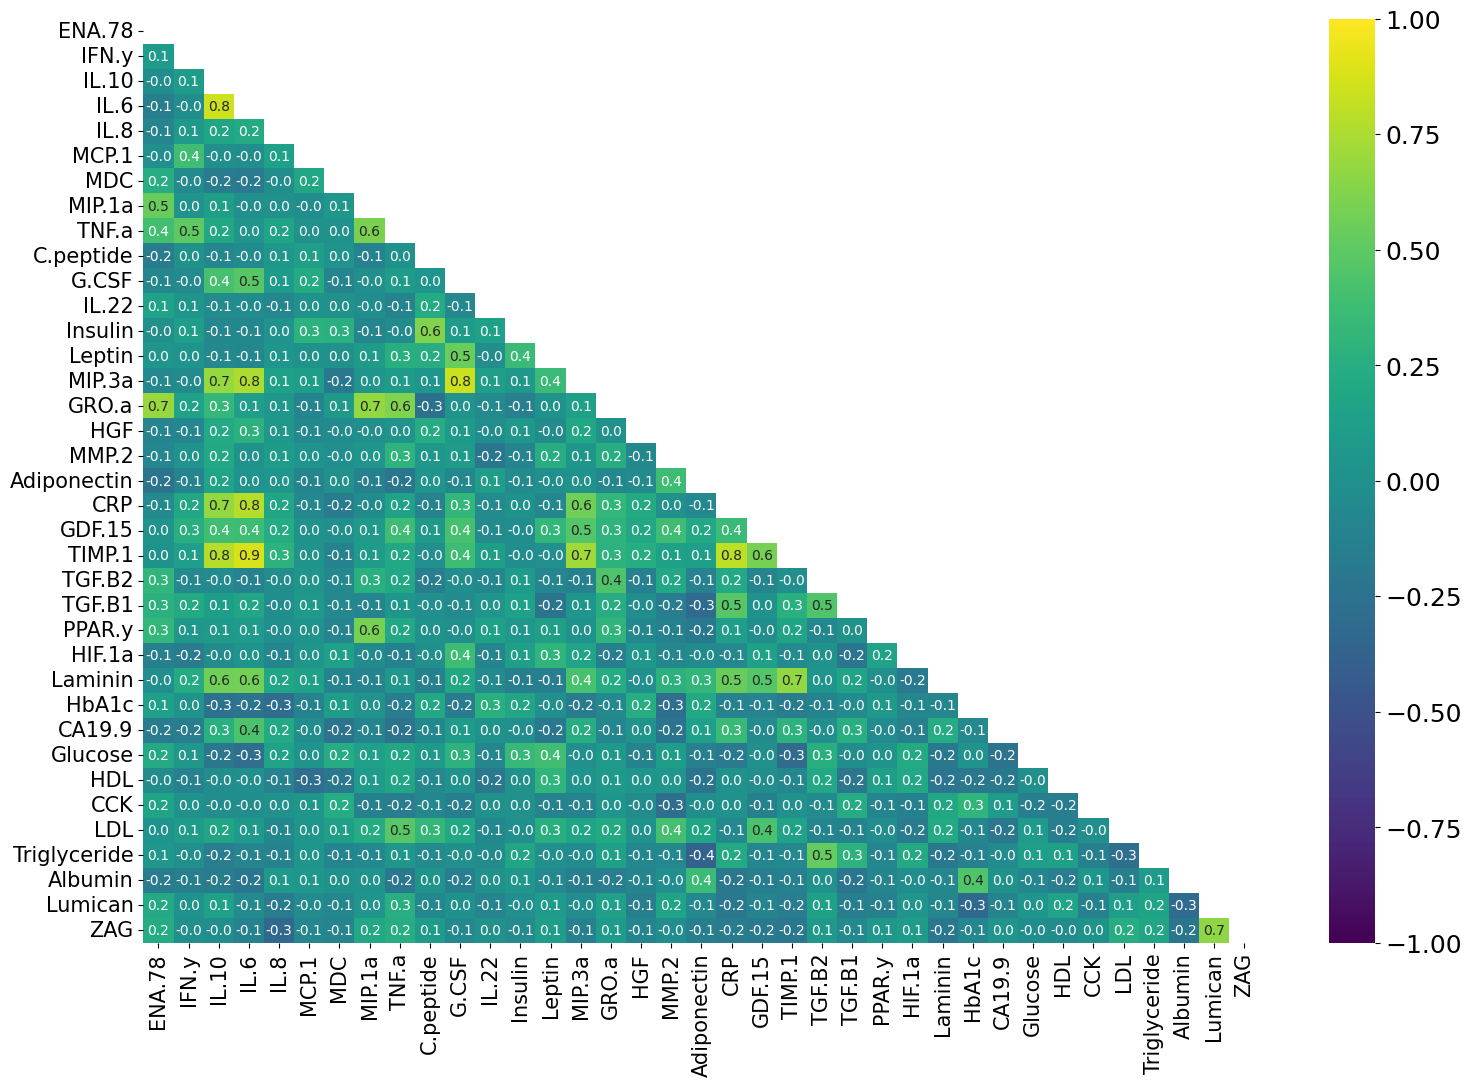

In [24]:

# Convert to pandas dataframe 
df_data = pd.DataFrame(data=ndata_PCa, 
                    columns=col_names)

plt.figure(figsize=(18, 12))
corr = df_data.corr() 
mask = np.tri(*corr.shape).T 

ax = sns.heatmap(corr, vmax=1, vmin=-1, mask=mask, annot=True, cmap='viridis', fmt=".1f", annot_kws={"size": 10})

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)


# Adjust the font size of the x and y tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)

savefig('./figs/PCa_p_corr')


In [25]:
ndata_Ca = ndata_f.copy()
ndata_Ca = ndata_Ca[ndata_Ca.CACHEXSTAGE0VIG != 'NCa']
ndata_Ca = ndata_Ca[ndata_Ca.CACHEXSTAGE0VIG != 'PCa']
ndata_Ca = ndata_Ca[ndata_Ca.CACHEXSTAGE0VIG != 'RCa']

ndata_Ca = ndata_Ca.drop('DATSTAT_ALTPID', axis=1)

all_col_names = ndata_Ca.columns.tolist()
col_names = all_col_names[:-1]

print(col_names)

# print(all_col_names)

['ENA.78', 'IFN.y', 'IL.10', 'IL.6', 'IL.8', 'MCP.1', 'MDC', 'MIP.1a', 'TNF.a', 'C.peptide', 'G.CSF', 'IL.22', 'Insulin', 'Leptin', 'MIP.3a', 'GRO.a', 'HGF', 'MMP.2', 'Adiponectin', 'CRP', 'GDF.15', 'TIMP.1', 'TGF.B2', 'TGF.B1', 'PPAR.y', 'HIF.1a', 'Laminin', 'HbA1c', 'CA19.9', 'Glucose', 'HDL', 'CCK', 'LDL', 'Triglyceride', 'Albumin', 'Lumican', 'ZAG']


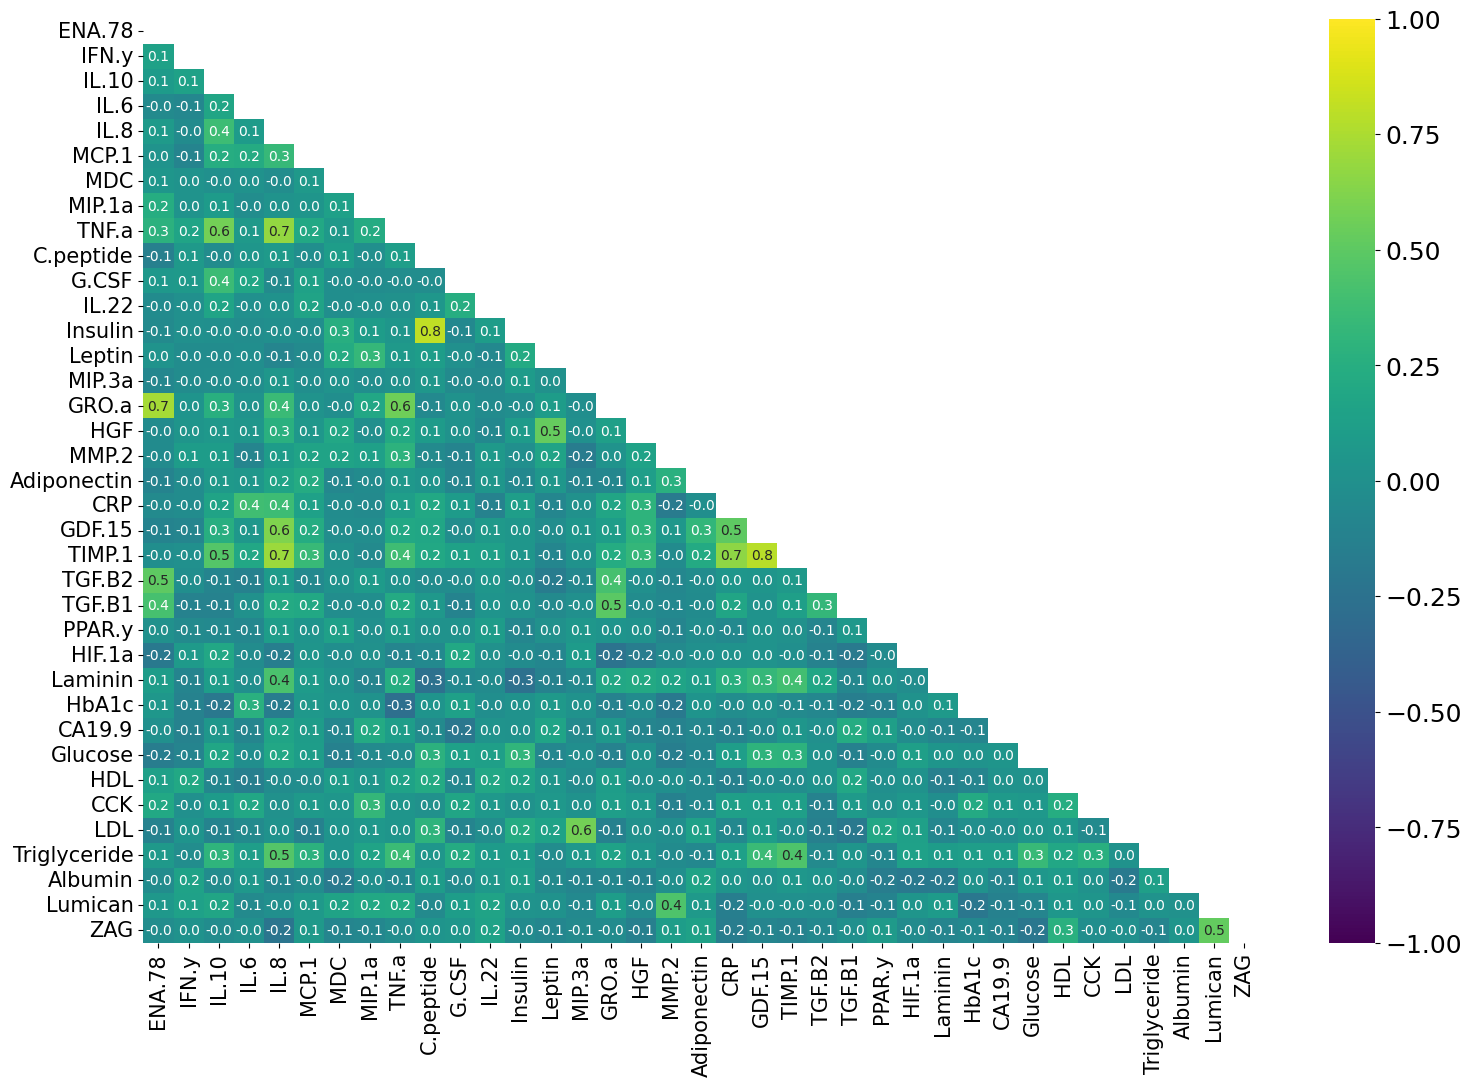

In [26]:

# Convert to pandas dataframe 
df_data = pd.DataFrame(data=ndata_Ca, 
                    columns=col_names)

plt.figure(figsize=(18, 12))
corr = df_data.corr() 
mask = np.tri(*corr.shape).T 

ax = sns.heatmap(corr, vmax=1, vmin=-1, mask=mask, annot=True, cmap='viridis', fmt=".1f", annot_kws={"size": 10})

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)


# Adjust the font size of the x and y tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)

savefig('./figs/Ca_p_corr')


In [27]:
ndata_RCa = ndata_f.copy()
ndata_RCa = ndata_RCa[ndata_RCa.CACHEXSTAGE0VIG != 'NCa']
ndata_RCa = ndata_RCa[ndata_RCa.CACHEXSTAGE0VIG != 'PCa']
ndata_RCa = ndata_RCa[ndata_RCa.CACHEXSTAGE0VIG != 'Ca']

ndata_RCa = ndata_RCa.drop('DATSTAT_ALTPID', axis=1)

all_col_names = ndata_RCa.columns.tolist()
col_names = all_col_names[:-1]

print(col_names)

# print(all_col_names)

['ENA.78', 'IFN.y', 'IL.10', 'IL.6', 'IL.8', 'MCP.1', 'MDC', 'MIP.1a', 'TNF.a', 'C.peptide', 'G.CSF', 'IL.22', 'Insulin', 'Leptin', 'MIP.3a', 'GRO.a', 'HGF', 'MMP.2', 'Adiponectin', 'CRP', 'GDF.15', 'TIMP.1', 'TGF.B2', 'TGF.B1', 'PPAR.y', 'HIF.1a', 'Laminin', 'HbA1c', 'CA19.9', 'Glucose', 'HDL', 'CCK', 'LDL', 'Triglyceride', 'Albumin', 'Lumican', 'ZAG']


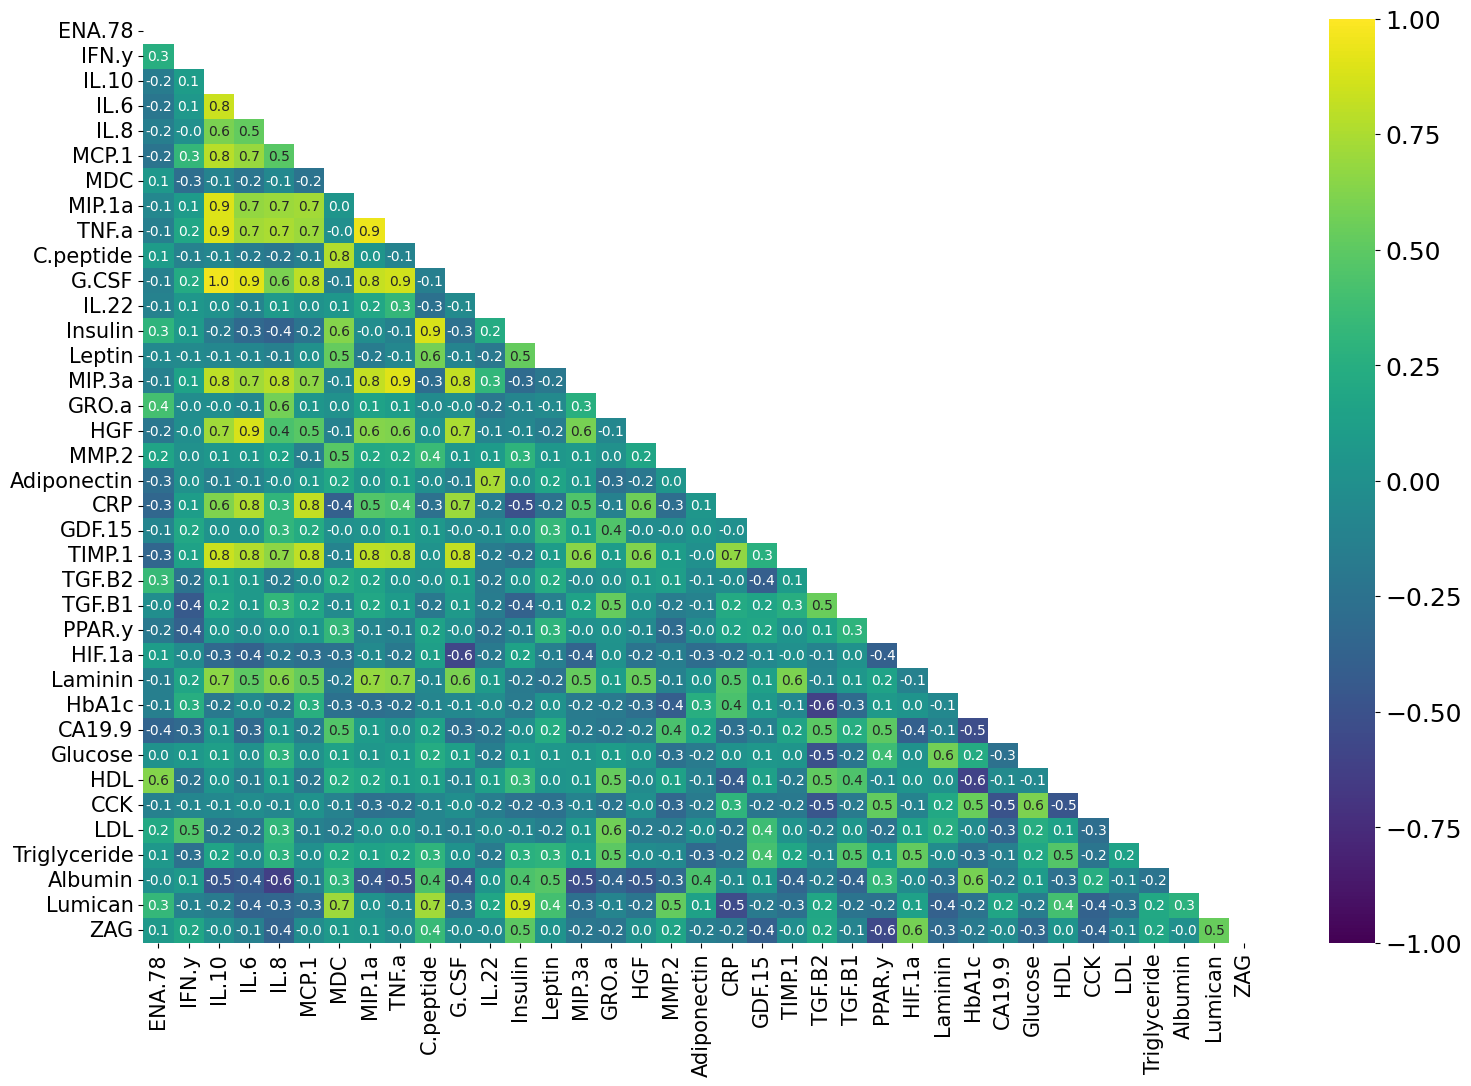

In [28]:

# Convert to pandas dataframe 
df_data = pd.DataFrame(data=ndata_RCa, 
                    columns=col_names)

plt.figure(figsize=(18, 12))
corr = df_data.corr() 
mask = np.tri(*corr.shape).T 

ax = sns.heatmap(corr, vmax=1, vmin=-1, mask=mask, annot=True, cmap='viridis', fmt=".1f", annot_kws={"size": 10})

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)


# Adjust the font size of the x and y tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)

savefig('./figs/RCa_p_corr')


In [29]:

ndata_noR = ndata_f[ndata_f.CACHEXSTAGE0VIG != 'RCa']

print(ndata_noR.count())
print(ndata_noR.shape)

DATSTAT_ALTPID     184
ENA.78             184
IFN.y              184
IL.10              183
IL.6               184
IL.8               184
MCP.1              184
MDC                184
MIP.1a             178
TNF.a              184
C.peptide          183
G.CSF              184
IL.22              175
Insulin            181
Leptin             181
MIP.3a             170
GRO.a              184
HGF                184
MMP.2              182
Adiponectin        184
CRP                184
GDF.15             184
TIMP.1             184
TGF.B2             164
TGF.B1             184
PPAR.y             183
HIF.1a             172
Laminin            184
HbA1c              184
CA19.9             170
Glucose            179
HDL                184
CCK                183
LDL                184
Triglyceride       163
Albumin            182
Lumican            184
ZAG                184
CACHEXSTAGE0VIG    184
dtype: int64
(184, 39)


In [30]:
# generate table for old data

from tableone import TableOne, load_dataset
from scipy import stats

# table for demographic data

col_tab = ['ENA.78', 'IFN.y', 'IL.10', 'IL.6', 'IL.8', 'MCP.1', 'MDC', 'MIP.1a', 'TNF.a', 'C.peptide', 'G.CSF', 'IL.22', 'Insulin', 
           'Leptin', 'MIP.3a', 'GRO.a', 'HGF', 'MMP.2', 'Adiponectin', 'CRP', 'GDF.15', 'TIMP.1', 'TGF.B2', 'TGF.B1', 'PPAR.y', 
           'HIF.1a', 'Laminin', 'HbA1c', 'CA19.9', 'Glucose', 'HDL', 'CCK', 'LDL', 'Triglyceride', 'Albumin', 'Lumican', 'ZAG', 'CACHEXSTAGE0VIG']

categorical = ['CACHEXSTAGE0VIG']

groupby = ['CACHEXSTAGE0VIG']

myTable_demo = TableOne(ndata_noR,columns=col_tab,categorical=categorical,groupby=groupby,pval=True)

print(myTable_demo.tabulate(tablefmt="latex"))







\begin{tabular}{llllllll}
\hline
                         &     & Missing   & Overall                        & Ca                             & NCa                            & PCa                            & P-Value   \\
\hline
 n                       &     &           & 184                            & 103                            & 28                             & 53                             &           \\
 ENA.78, mean (SD)       &     & 0         & 12654.3 (10303.6)              & 12977.4 (11022.0)              & 12394.3 (10294.5)              & 12163.8 (8933.2)               & 0.888     \\
 IFN.y, mean (SD)        &     & 0         & 144.1 (192.0)                  & 155.6 (188.3)                  & 107.0 (81.0)                   & 141.5 (236.1)                  & 0.493     \\
 IL.10, mean (SD)        &     & 1         & 12.6 (21.6)                    & 14.8 (19.8)                    & 6.5 (7.3)                      & 11.6 (28.7)                    & 0.177     \\
 IL.6, mea

In [31]:
# log2 transform of the data

ndata_noR_lg = ndata_noR
# Take the log2 of every column
ndata_noR_lg.iloc[:, 1:-1] = ndata_noR_lg.iloc[:, 1:-1].apply(np.log2)

ndata_noR_lg.head()

,DATSTAT_ALTPID,ENA.78,IFN.y,IL.10,IL.6,IL.8,MCP.1,MDC,MIP.1a,TNF.a,C.peptide,G.CSF,IL.22,Insulin,Leptin,MIP.3a,GRO.a,HGF,MMP.2,Adiponectin,CRP,GDF.15,TIMP.1,TGF.B2,TGF.B1,PPAR.y,HIF.1a,Laminin,HbA1c,CA19.9,Glucose,HDL,CCK,LDL,Triglyceride,Albumin,Lumican,ZAG,CACHEXSTAGE0VIG
0,AHO-0001,13.916013,7.273090,3.029456,5.659240,8.268986,11.527577,13.865503,8.083912,5.779740,15.431392,7.166060,3.122157,7.673252,19.218450,7.611351,11.153592,9.683319,14.708938,24.034801,22.709370,10.771228,19.043158,4.908729,15.279801,2.322793,9.061012,10.398379,9.262978,5.381906,6.760939,9.566549,8.341350,15.460096,6.312302,38.253144,21.651707,22.614309,Ca
1,AHO-0003,13.413987,7.017272,4.406002,5.749313,8.325166,11.946972,13.423097,7.808320,5.721612,12.590742,7.745697,4.475445,4.410839,17.053247,8.528102,12.007775,8.767061,15.312314,23.890241,24.537325,10.664005,18.191906,5.379034,15.735355,-0.163268,8.651576,9.384041,8.889537,5.610730,6.782055,8.843007,8.326537,15.076799,4.097021,37.911887,21.853215,22.753599,Ca
2,AHO-0004,12.155561,6.371741,3.122624,4.640329,7.589611,11.060571,12.990889,8.489696,5.277515,14.835624,6.713926,2.537235,6.661788,15.646671,8.700411,10.537126,8.953171,15.618983,25.082097,17.159383,11.949126,18.400430,5.089700,15.847463,1.585443,9.100063,10.205168,8.837253,3.465974,6.640303,8.763614,7.408652,13.646437,5.251113,38.072084,22.241676,23.389991,Ca
3,AHO-0007,12.648019,7.636532,2.497861,5.403342,7.766109,11.384904,14.308534,7.671604,5.345471,15.486000,7.511654,0.510718,7.846095,15.872675,NaN,11.255417,9.365120,14.889264,24.556051,20.980523,10.309600,18.476026,6.528291,15.895403,0.703101,10.574023,10.126528,8.931015,4.160759,6.609977,9.205136,8.231999,14.396560,5.167599,38.132027,21.580518,22.581380,NCa
4,AHO-0010,15.009380,7.755184,3.681927,5.594304,8.257115,11.226423,13.944030,7.759353,6.139892,13.594092,6.078899,3.236350,4.262899,11.598053,6.257174,12.781294,9.644030,15.066279,24.387674,21.509235,10.688646,18.980220,8.070273,16.919164,0.889863,10.242483,10.697531,8.779824,8.477528,6.301222,10.331331,10.245641,14.460000,5.469267,NaN,21.214114,22.134364,Ca


In [32]:
# table for demographic data

col_tab = ['ENA.78', 'IFN.y', 'IL.10', 'IL.6', 'IL.8', 'MCP.1', 'MDC', 'MIP.1a', 'TNF.a', 'C.peptide', 'G.CSF', 'IL.22', 'Insulin', 
           'Leptin', 'MIP.3a', 'GRO.a', 'HGF', 'MMP.2', 'Adiponectin', 'CRP', 'GDF.15', 'TIMP.1', 'TGF.B2', 'TGF.B1', 'PPAR.y', 
           'HIF.1a', 'Laminin', 'HbA1c', 'CA19.9', 'Glucose', 'HDL', 'CCK', 'LDL', 'Triglyceride', 'Albumin', 'Lumican', 'ZAG', 'CACHEXSTAGE0VIG']

categorical = ['CACHEXSTAGE0VIG']

groupby = ['CACHEXSTAGE0VIG']

myTable_demo_lg = TableOne(ndata_noR_lg,columns=col_tab,categorical=categorical,groupby=groupby,pval=True)

print(myTable_demo_lg.tabulate(tablefmt="latex"))





\begin{tabular}{llllllll}
\hline
                         &     & Missing   & Overall    & Ca          & NCa        & PCa        & P-Value   \\
\hline
 n                       &     &           & 184        & 103         & 28         & 53         &           \\
 ENA.78, mean (SD)       &     & 0         & 13.2 (1.2) & 13.2 (1.2)  & 13.2 (1.1) & 13.2 (1.2) & 0.978     \\
 IFN.y, mean (SD)        &     & 0         & 6.5 (1.3)  & 6.7 (1.2)   & 6.4 (1.1)  & 6.2 (1.6)  & 0.037     \\
 IL.10, mean (SD)        &     & 1         & 2.7 (1.6)  & 3.1 (1.4)   & 2.0 (1.5)  & 2.2 (1.7)  & \ensuremath{<}0.001    \\
 IL.6, mean (SD)         &     & 0         & 5.0 (1.4)  & 5.2 (1.4)   & 4.3 (1.0)  & 4.9 (1.4)  & 0.016     \\
 IL.8, mean (SD)         &     & 0         & 7.9 (1.2)  & 8.2 (1.3)   & 7.3 (0.7)  & 7.8 (0.9)  & 0.001     \\
 MCP.1, mean (SD)        &     & 0         & 11.5 (0.6) & 11.5 (0.6)  & 11.3 (0.5) & 11.5 (0.5) & 0.340     \\
 MDC, mean (SD)          &     & 0         & 13.6 (0.5) & 1

In [33]:


ndata_noR = ndata_noR.replace(to_replace='NCa',value='0.0')
ndata_noR = ndata_noR.replace(to_replace='PCa',value='1.0')
ndata_noR = ndata_noR.replace(to_replace='Ca',value='2.0')

# copy following feats

ndata_noR_ft = ndata_noR[['DATSTAT_ALTPID', 'ENA.78', 'IFN.y', 'IL.10', 'IL.6', 'IL.8', 'MCP.1', 'MDC', 'MIP.1a', 'TNF.a', 'C.peptide', 'G.CSF', 'IL.22', 'Insulin', 
                          'Leptin', 'MIP.3a', 'GRO.a', 'HGF', 'MMP.2', 'Adiponectin', 'CRP', 'GDF.15', 'TIMP.1', 'TGF.B2', 'TGF.B1', 'PPAR.y', 'HIF.1a', 'Laminin', 
                          'HbA1c', 'CA19.9', 'Glucose', 'HDL', 'CCK', 'LDL', 'Triglyceride', 'Albumin', 'Lumican', 'ZAG', 'CACHEXSTAGE0VIG']].copy()

ndata_noR_ft.reset_index(drop=True, inplace=True)

print(ndata_noR_ft.count())
print(ndata_noR_ft.shape)

DATSTAT_ALTPID     184
ENA.78             184
IFN.y              184
IL.10              183
IL.6               184
IL.8               184
MCP.1              184
MDC                184
MIP.1a             178
TNF.a              184
C.peptide          183
G.CSF              184
IL.22              175
Insulin            181
Leptin             181
MIP.3a             170
GRO.a              184
HGF                184
MMP.2              182
Adiponectin        184
CRP                184
GDF.15             184
TIMP.1             184
TGF.B2             164
TGF.B1             184
PPAR.y             183
HIF.1a             172
Laminin            184
HbA1c              184
CA19.9             170
Glucose            179
HDL                184
CCK                183
LDL                184
Triglyceride       163
Albumin            182
Lumican            184
ZAG                184
CACHEXSTAGE0VIG    184
dtype: int64
(184, 39)


In [34]:
ndata_noR_ft = ndata_noR_ft.drop('DATSTAT_ALTPID', axis=1)

In [35]:
# a correlation map

In [36]:
all_col_names = ndata_noR_ft.columns.tolist()

print(all_col_names)

['ENA.78', 'IFN.y', 'IL.10', 'IL.6', 'IL.8', 'MCP.1', 'MDC', 'MIP.1a', 'TNF.a', 'C.peptide', 'G.CSF', 'IL.22', 'Insulin', 'Leptin', 'MIP.3a', 'GRO.a', 'HGF', 'MMP.2', 'Adiponectin', 'CRP', 'GDF.15', 'TIMP.1', 'TGF.B2', 'TGF.B1', 'PPAR.y', 'HIF.1a', 'Laminin', 'HbA1c', 'CA19.9', 'Glucose', 'HDL', 'CCK', 'LDL', 'Triglyceride', 'Albumin', 'Lumican', 'ZAG', 'CACHEXSTAGE0VIG']


In [37]:
col_names = all_col_names[0:-1]

print(col_names)

['ENA.78', 'IFN.y', 'IL.10', 'IL.6', 'IL.8', 'MCP.1', 'MDC', 'MIP.1a', 'TNF.a', 'C.peptide', 'G.CSF', 'IL.22', 'Insulin', 'Leptin', 'MIP.3a', 'GRO.a', 'HGF', 'MMP.2', 'Adiponectin', 'CRP', 'GDF.15', 'TIMP.1', 'TGF.B2', 'TGF.B1', 'PPAR.y', 'HIF.1a', 'Laminin', 'HbA1c', 'CA19.9', 'Glucose', 'HDL', 'CCK', 'LDL', 'Triglyceride', 'Albumin', 'Lumican', 'ZAG']


In [38]:
ndata_noR_ft

,ENA.78,IFN.y,IL.10,IL.6,IL.8,MCP.1,MDC,MIP.1a,TNF.a,C.peptide,G.CSF,IL.22,Insulin,Leptin,MIP.3a,GRO.a,HGF,MMP.2,Adiponectin,CRP,GDF.15,TIMP.1,TGF.B2,TGF.B1,PPAR.y,HIF.1a,Laminin,HbA1c,CA19.9,Glucose,HDL,CCK,LDL,Triglyceride,Albumin,Lumican,ZAG,CACHEXSTAGE0VIG
0,13.916013,7.273090,3.029456,5.659240,8.268986,11.527577,13.865503,8.083912,5.779740,15.431392,7.166060,3.122157,7.673252,19.218450,7.611351,11.153592,9.683319,14.708938,24.034801,22.709370,10.771228,19.043158,4.908729,15.279801,2.322793,9.061012,10.398379,9.262978,5.381906,6.760939,9.566549,8.341350,15.460096,6.312302,38.253144,21.651707,22.614309,2.0
1,13.413987,7.017272,4.406002,5.749313,8.325166,11.946972,13.423097,7.808320,5.721612,12.590742,7.745697,4.475445,4.410839,17.053247,8.528102,12.007775,8.767061,15.312314,23.890241,24.537325,10.664005,18.191906,5.379034,15.735355,-0.163268,8.651576,9.384041,8.889537,5.610730,6.782055,8.843007,8.326537,15.076799,4.097021,37.911887,21.853215,22.753599,2.0
2,12.155561,6.371741,3.122624,4.640329,7.589611,11.060571,12.990889,8.489696,5.277515,14.835624,6.713926,2.537235,6.661788,15.646671,8.700411,10.537126,8.953171,15.618983,25.082097,17.159383,11.949126,18.400430,5.089700,15.847463,1.585443,9.100063,10.205168,8.837253,3.465974,6.640303,8.763614,7.408652,13.646437,5.251113,38.072084,22.241676,23.389991,2.0
3,12.648019,7.636532,2.497861,5.403342,7.766109,11.384904,14.308534,7.671604,5.345471,15.486000,7.511654,0.510718,7.846095,15.872675,NaN,11.255417,9.365120,14.889264,24.556051,20.980523,10.309600,18.476026,6.528291,15.895403,0.703101,10.574023,10.126528,8.931015,4.160759,6.609977,9.205136,8.231999,14.396560,5.167599,38.132027,21.580518,22.581380,0.0
4,15.009380,7.755184,3.681927,5.594304,8.257115,11.226423,13.944030,7.759353,6.139892,13.594092,6.078899,3.236350,4.262899,11.598053,6.257174,12.781294,9.644030,15.066279,24.387674,21.509235,10.688646,18.980220,8.070273,16.919164,0.889863,10.242483,10.697531,8.779824,8.477528,6.301222,10.331331,10.245641,14.460000,5.469267,NaN,21.214114,22.134364,2.0
5,12.489680,7.022791,3.285967,4.433472,7.516970,11.151047,13.250457,7.567160,5.341908,12.931209,6.584116,1.572172,4.180993,13.974773,NaN,10.906915,9.203311,15.148484,25.327781,20.763011,10.385593,17.951925,5.014872,15.125553,0.086784,9.518218,10.581613,8.264161,-8.380822,6.060004,9.101792,8.213250,14.720629,4.330917,38.135046,21.512590,21.514966,0.0
6,13.189306,6.382115,3.254247,5.148722,8.136156,11.251296,13.593373,8.306497,5.754229,16.936050,6.784243,1.518603,10.122872,18.310080,7.538368,11.179050,9.322076,15.354492,23.245275,21.586272,9.790895,18.128013,4.594089,16.012930,3.471448,12.146320,10.472401,8.379352,7.538980,7.749313,9.587509,8.105762,15.960987,5.884940,38.009970,21.093460,22.319398,0.0
7,10.469796,6.639167,2.535385,3.680755,7.242309,10.918836,12.429500,7.689096,4.774010,14.195973,6.366578,2.685689,5.506667,15.228819,7.407611,10.688330,8.150104,14.513043,24.368783,18.586754,9.925173,17.627865,5.792960,15.610537,4.374622,9.880595,10.065088,8.400790,2.883034,6.154393,8.741083,7.366296,14.599563,4.871006,38.097609,20.879152,21.965336,0.0
8,11.897652,6.236311,2.759311,5.463887,8.161585,11.261104,13.771204,7.673526,5.662587,14.992335,6.371101,1.937535,6.017148,19.576809,7.636095,11.550458,9.366695,14.956103,24.322585,24.168970,10.815140,18.913972,NaN,14.903356,1.107688,9.528981,11.300245,8.814525,2.857185,5.948274,10.204059,8.660181,15.330160,4.965369,38.243977,21.531321,22.694947,1.0
9,12.542386,7.985750,2.398229,4.272370,7.762380,12.161132,13.436033,7.970843,5.468463,14.318430,7.252901,1.090911,5.334841,15.896522,6.390539,11.072803,8.717022,14.921530,24.633102,21.281778,9.667154,18.132777,5.646254,15.772068,1.560715,11.878360,10.304649,8.199849,8.878308,5.744672,10.205957,7.913434,15.474988,6.608558,37.985919,22.266967,23.540503,0.0


In [39]:
# save to csv file

# 
ndata_noR_ft.to_csv('data/ext_baselinedata_35F_2.csv', index=False)

In [40]:
# calculate proportion of missingness in ndata_noR

# total num of NaN in the ndata_noR
total_nan_count = ndata_noR_ft.isna().sum().sum()

# total num of cells in ndata_noR
total_cells = ndata_noR_ft.size

# proportion of NaN
NaN_proportion = total_nan_count / total_cells

print('NaN_proportions:',NaN_proportion)


NaN_proportions: 0.01644736842105263
